In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

### Merging 12 months of sales data into a single csv file

In [152]:
files = [file for file in os.listdir('./Sales_Data')]
li = []

for file in files:
    df = pd.read_excel("./Sales_Data/" + file)
    li.append(df)

sales = pd.concat(li, ignore_index= True)
sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the Data

#### Droping rows with NaN values

In [153]:
sales = sales.dropna()
sales = sales.reset_index(drop = True)

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Getting rid of text in Order Date Column

In [154]:
temp_df = sales[sales['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [155]:
sales = sales[sales['Order Date'].str[0:2] != 'Or']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [156]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors = 'ignore')

sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Augmenting Data with Additional columns

#### Adding month column

In [211]:
sales['Month'] = sales['Order Date'].dt.month

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Adding sales column

In [212]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
dtype: object

In [261]:
sales['Sales'] = sales['Quantity Ordered'] * sales['Price Each']

sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


## Removing Duplicates

In [318]:
sales_clean =  sales[~sales.duplicated(['Purchase Address', 'Product', 'Order Date'])]
sales_clean.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [319]:
sales_clean[sales_clean.duplicated(['Purchase Address', 'Product', 'Order Date'])]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales


#

#

## Data Exploration

In [329]:
monthly_sales = sales_clean.groupby('Month').sum(numeric_only = True)
monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1810924.81,1821413.16
2,13425,2186904.50,2200012.30
3,16976,2789065.86,2804954.57
4,20532,3366208.09,3389203.47
5,18641,3133079.92,3150537.62
6,15232,2560488.56,2576265.21
7,16051,2631210.18,2646434.43
8,13418,2226945.55,2241042.83
9,13090,2081885.66,2094453.70


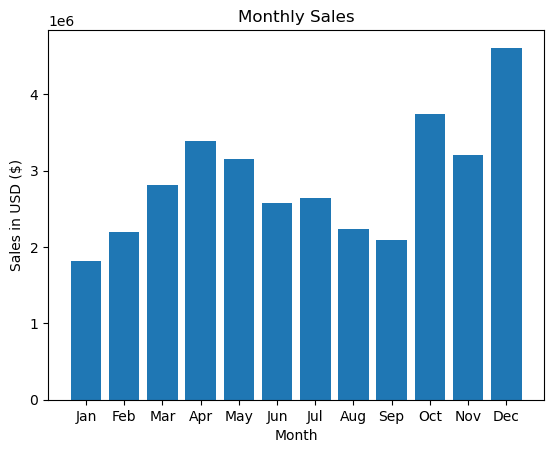

In [330]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',  'Dec']

plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Monthly Sales')


plt.show()

#### The month of December was the best month for sales.

#


In [356]:
address = sales_clean['Purchase Address'].str.split(',', expand = True)
address['City'] = address[1] + address[2].str[:3]

sales_clean['City'] = address['City']

sales_clean.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [358]:
citywise_sales = sales_clean.groupby('City').sum(numeric_only = True)
citywise_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16582,2778589.90,104629,2794180.28
Austin TX,11132,1808317.40,69702,1818002.91
Boston MA,22486,3634365.95,140854,3658576.41
Dallas TX,16699,2749993.47,104417,2765323.12
Los Angeles CA,33239,5417158.04,207985,5448276.11
New York City NY,27889,4632876.14,175503,4661785.60
Portland ME,2745,446740.37,17110,449309.39
Portland OR,11285,1859811.67,70492,1869967.85
San Francisco CA,50147,8203936.06,314854,8254633.38


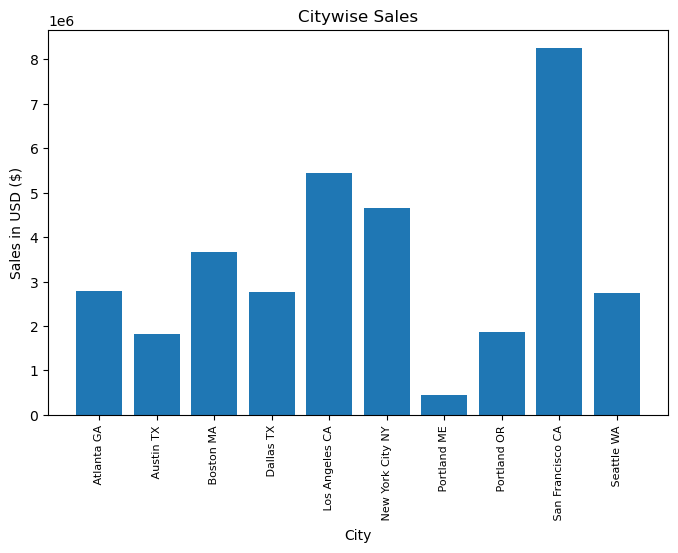

In [369]:
city = [city for city, df in sales_clean.groupby('City')]

plt.figure(figsize=(8, 5))

plt.bar(city, citywise_sales['Sales'])
plt.xticks(rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Citywise Sales')


plt.show()

#### The city of San Francisco had the most sales.

#

### What time should we display advertisements to maximize likelihood of customer's buying products

In [372]:
sales_clean['Hour'] = sales['Order Date'].dt.hour

sales_clean.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


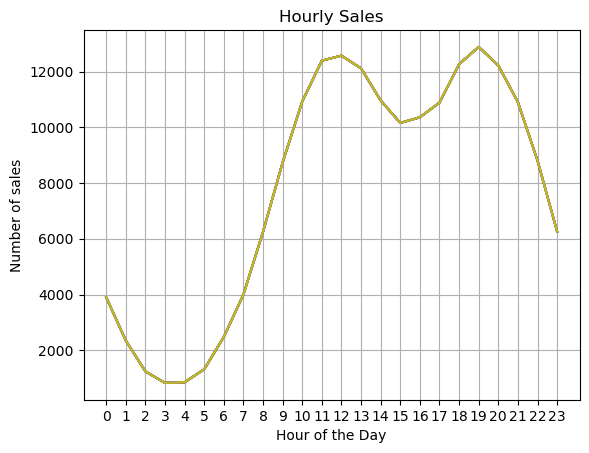

In [380]:
hours = np.arange(0,24)

plt.plot(hours, sales_clean.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of sales')
plt.xlabel('Hour of the Day')
plt.title('Hourly Sales')

plt.grid()

plt.show()

#### The chart shows us that we should target our advertisements right before 11am or 6pm (just before the peak time)  

#

## What products are most often sold together

In [402]:
grouped = sales_clean[sales_clean.duplicated(['Order ID'], keep = False)]

grouped['Grouped'] = sales_clean.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
grouped = grouped[['Order ID', 'Grouped']].drop_duplicates()

grouped.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [422]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Iphone and Lightning Charging Cable are frequently bought together.
This is due to Apple not including the Lightning Charging Cable with iPhones.

#


## Which product sold the most and why?

In [430]:
product_count = sales_clean.groupby(['Product']).sum(numeric_only = True)

product_count

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4126,450739.02,29319,453818.74,58729
27in 4K Gaming Monitor,6239,2427687.75,44396,2433147.61,90841
27in FHD Monitor,7541,1124625.02,52484,1131074.59,107422
34in Ultrawide Monitor,6192,2346058.26,43258,2352898.08,88957
AA Batteries (4-pack),27588,78881.28,145286,105937.92,297816
AAA Batteries (4-pack),30949,61573.07,146005,92537.51,296660
Apple Airpods Headphones,15637,2328750.00,109304,2345550.00,222938
Bose SoundSport Headphones,13430,1329667.02,93918,1342865.70,192077
Flatscreen TV,4813,1438200.00,34172,1443900.00,68719


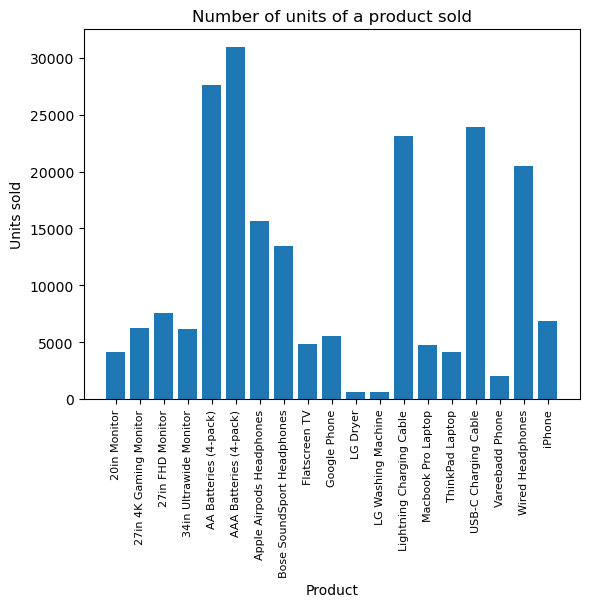

In [432]:
product = [product for product, df in product_count.groupby('Product')]


plt.bar(product, product_count['Quantity Ordered'])
plt.xticks(rotation = 'vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Units sold')
plt.title('Number of units of a product sold')


plt.show()

<Figure size 4000x3000 with 0 Axes>

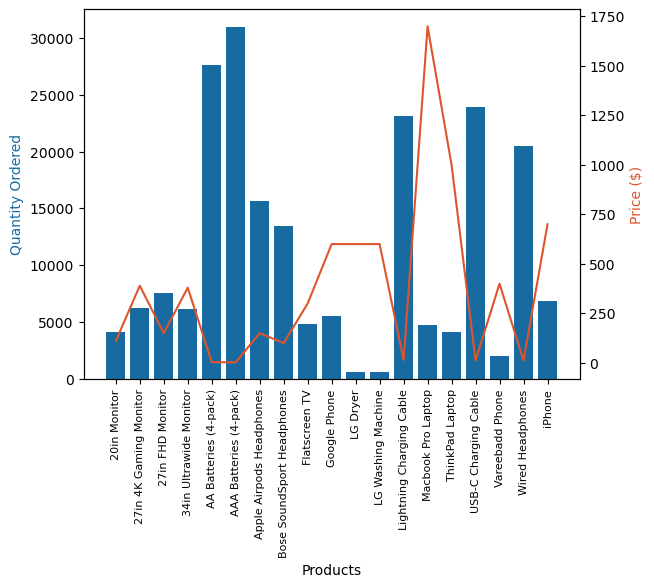

In [457]:
prices = sales_clean.groupby('Product').mean(numeric_only = True)['Price Each']

plt.figure(figsize = (8, 6), dpi = 500)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, product_count['Quantity Ordered'], color='#176BA0')
ax2.plot(product, prices, color = '#DE542C')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color = '#176BA0')
ax2.set_ylabel('Price ($)', color= '#DE542C')

ax1.set_xticks(product)
ax1.set_xticklabels(product, rotation = "vertical", size = 8)

plt.show()

The items that are sold the most have a lower price and are common household items that are used in day-to-day life.